In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [16]:

# ==============================================================================
# 1. LOAD AND INSPECT THE DATA
# ==============================================================================

# Read the data (adjust the filename as needed)
# If it's tab-separated, use sep='\t'
df = pd.read_csv('trial-data.csv') #, sep='\t')

print("=" * 80)
print("DATA OVERVIEW")
print("=" * 80)
print(f"Total number of participants: {len(df)}")
print(f"\nColumn names:\n{df.columns.tolist()}\n")
print("\nFirst few rows:")
print(df.head())


DATA OVERVIEW
Total number of participants: 35

Column names:
['ID', '开始时间', '完成时间', '电子邮件', '名称', '上次修改时间', 'Age start learning English', 'Gender', 'Pick the sentence you think is more natural.', 'Pick the sentence you think is more natural.2', 'Pick the sentence you think is more natural.3', 'Pick the sentence you think is more natural.4', 'Pick the sentence you think is more natural.5', 'Pick the sentence you think is more natural.6', 'Pick the sentence you think is more natural.7', 'Pick the sentence you think is more natural.8']


First few rows:
   ID               开始时间               完成时间       电子邮件  名称  上次修改时间  \
0   1  10/22/25 14:25:55  10/22/25 14:26:05  anonymous NaN     NaN   
1   2  10/22/25 14:25:55  10/22/25 14:26:05  anonymous NaN     NaN   
2   3  10/22/25 14:26:12  10/22/25 14:26:21  anonymous NaN     NaN   
3   4  10/22/25 14:26:12  10/22/25 14:26:21  anonymous NaN     NaN   
4   5  10/22/25 14:26:12  10/22/25 14:26:21  anonymous NaN     NaN   

   Age start learning

In [17]:

# ==============================================================================
# 2. DESCRIPTIVE STATISTICS
# ==============================================================================

print("\n" + "=" * 80)
print("DESCRIPTIVE STATISTICS")
print("=" * 80)

print("\n--- Age of Starting to Learn English ---")
print(df['Age start learning English'].describe())
print(f"\nAge distribution:")
print(df['Age start learning English'].value_counts().sort_index())

print("\n--- Gender Distribution ---")
print(df['Gender'].value_counts())



DESCRIPTIVE STATISTICS

--- Age of Starting to Learn English ---
count    35.000000
mean      6.057143
std       2.484574
min       2.000000
25%       5.000000
50%       6.000000
75%       7.500000
max      11.000000
Name: Age start learning English, dtype: float64

Age distribution:
Age start learning English
2      3
3      3
5     10
6     10
9      4
10     4
11     1
Name: count, dtype: int64

--- Gender Distribution ---
Gender
male      18
female    17
Name: count, dtype: int64


In [18]:

# ==============================================================================
# 3. DEFINE GOOD/BAD SENTENCES FOR EACH QUESTION
# ==============================================================================

# Define which sentence is "good" (grammatical/acceptable) according to linguistics
# Based on the original data, the second sentence in each pair is the "good" one

sentence_key = {
    'Pick the sentence you think is more natural.': {
        'good': 'We proclaimed John to the public to be a hero.',
        'bad': 'We proclaimed to the public John to be a hero.'
    },
    'Pick the sentence you think is more natural.2': {
        'good': 'John wants for everyone to have fun that you do.',
        'bad': 'John wants for everyone you do to have fun.'
    },
    'Pick the sentence you think is more natural.3': {
        'good': 'Wendy stood more buckets than Peter did in the garage.',
        'bad': 'Wendy stood more buckets in the garage than Peter did in the basement.'
    },
    'Pick the sentence you think is more natural.4': {
        'good': 'That John likes Mary, Jane didn\'t believe',
        'bad': 'John likes Mary, Jane didn\'t believe'
    },
    'Pick the sentence you think is more natural.5': {
        'good': 'I expect that everyone will visit Mary that you do.',
        'bad': 'I expect that everyone you do will visit Mary.'
    },
    'Pick the sentence you think is more natural.6': {
        'good': 'There is likely to appear a man.',
        'bad': 'There is likely a man to appear.'
    },
    'Pick the sentence you think is more natural.7': {
        'good': 'What did you give to whom?',
        'bad': 'To whom did you give what?'
    },
    'Pick the sentence you think is more natural.8': {
        'good': 'Bill knows that such books John only reads at home.',
        'bad': 'Bill asked if such books John only reads at home.'
    }
}

# Question labels for easier reference
question_labels = {
    'Pick the sentence you think is more natural.': 'Q1: Proclamation',
    'Pick the sentence you think is more natural.2': 'Q2: Wants',
    'Pick the sentence you think is more natural.3': 'Q3: Buckets',
    'Pick the sentence you think is more natural.4': 'Q4: Believe',
    'Pick the sentence you think is more natural.5': 'Q5: Expect',
    'Pick the sentence you think is more natural.6': 'Q6: Likely',
    'Pick the sentence you think is more natural.7': 'Q7: Give',
    'Pick the sentence you think is more natural.8': 'Q8: Books'
}


In [19]:

# ==============================================================================
# 4. CODE RESPONSES AS GOOD/BAD
# ==============================================================================

# Create new columns coding whether participant chose the "good" sentence
question_cols = [col for col in df.columns if col.startswith('Pick the sentence')]

for col in question_cols:
    # Create a binary column: 1 if chose good sentence, 0 if chose bad sentence
    df[f'{col}_coded'] = df[col].apply(
        lambda x: 1 if x == sentence_key[col]['good'] else 0
    )

print("\n" + "=" * 80)
print("RESPONSE CODING")
print("=" * 80)
print("\nFor each question, responses coded as:")
print("1 = chose linguistically 'good' sentence")
print("0 = chose linguistically 'bad' sentence\n")



RESPONSE CODING

For each question, responses coded as:
1 = chose linguistically 'good' sentence
0 = chose linguistically 'bad' sentence



In [20]:

# ==============================================================================
# 5. OVERALL ACCURACY ANALYSIS
# ==============================================================================

print("=" * 80)
print("OVERALL ACCURACY (% choosing 'good' sentence)")
print("=" * 80)

coded_cols = [col for col in df.columns if col.endswith('_coded')]
accuracy_by_question = {}

for i, col in enumerate(coded_cols, 1):
    accuracy = df[col].mean() * 100
    q_label = question_labels[question_cols[i-1]]
    accuracy_by_question[q_label] = accuracy
    print(f"{q_label}: {accuracy:.1f}%")

overall_accuracy = df[coded_cols].mean().mean() * 100
print(f"\nOverall accuracy across all questions: {overall_accuracy:.1f}%")


OVERALL ACCURACY (% choosing 'good' sentence)
Q1: Proclamation: 71.4%
Q2: Wants: 28.6%
Q3: Buckets: 28.6%
Q4: Believe: 100.0%
Q5: Expect: 0.0%
Q6: Likely: 0.0%
Q7: Give: 0.0%
Q8: Books: 100.0%

Overall accuracy across all questions: 41.1%


In [ ]:

# ==============================================================================
# 6. ANALYSIS BY AGE OF ACQUISITION
# ==============================================================================

print("\n" + "=" * 80)
print("ANALYSIS BY AGE OF STARTING TO LEARN ENGLISH")
print("=" * 80)

# Create age groups
df['Age_Group'] = pd.cut(df['Age start learning English'], 
                         bins=[0, 3, 6, 10, 15], 
                         labels=['0-3 years', '4-6 years', '7-10 years', '11+ years'])

age_accuracy = df.groupby('Age_Group')[coded_cols].mean() * 100
print("\nAccuracy by age group (%):")
print(age_accuracy.mean(axis=1).round(1))

print("\nDetailed breakdown by question:")
print(age_accuracy.round(1))




ANALYSIS BY AGE OF STARTING TO LEARN ENGLISH

Accuracy by age group (%):
Age_Group
0-3 years     41.7
4-6 years     41.2
7-10 years    39.1
11+ years     50.0
dtype: float64

Detailed breakdown by question:
            Pick the sentence you think is more natural._coded  \
Age_Group                                                        
0-3 years                                                66.7    
4-6 years                                                70.0    
7-10 years                                               87.5    
11+ years                                                 0.0    

            Pick the sentence you think is more natural.2_coded  \
Age_Group                                                         
0-3 years                                                33.3     
4-6 years                                                30.0     
7-10 years                                               12.5     
11+ years                                               100.

/var/folders/yw/bcvpzzzs41191x2_vrf3xjcr0000gn/T/ipykernel_57745/909348594.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_accuracy = df.groupby('Age_Group')[coded_cols].mean() * 100


In [23]:

# ==============================================================================
# 7. ANALYSIS BY GENDER
# ==============================================================================

print("\n" + "=" * 80)
print("ANALYSIS BY GENDER")
print("=" * 80)

gender_accuracy = df.groupby('Gender')[coded_cols].mean() * 100
print("\nAccuracy by gender (%):")
print(gender_accuracy.mean(axis=1).round(1))

print("\nDetailed breakdown by question:")
print(gender_accuracy.round(1))


ANALYSIS BY GENDER

Accuracy by gender (%):
Gender
female    41.2
male      41.0
dtype: float64

Detailed breakdown by question:
        Pick the sentence you think is more natural._coded  \
Gender                                                       
female                                               70.6    
male                                                 72.2    

        Pick the sentence you think is more natural.2_coded  \
Gender                                                        
female                                               29.4     
male                                                 27.8     

        Pick the sentence you think is more natural.3_coded  \
Gender                                                        
female                                               29.4     
male                                                 27.8     

        Pick the sentence you think is more natural.4_coded  \
Gender                                              


ITEM DIFFICULTY ANALYSIS
        Question  Accuracy (%)  N Correct  N Total
     Q4: Believe    100.000000         35       35
       Q8: Books    100.000000         35       35
Q1: Proclamation     71.428571         25       35
       Q2: Wants     28.571429         10       35
     Q3: Buckets     28.571429         10       35
      Q5: Expect      0.000000          0       35
      Q6: Likely      0.000000          0       35
        Q7: Give      0.000000          0       35

GENERATING VISUALIZATIONS...


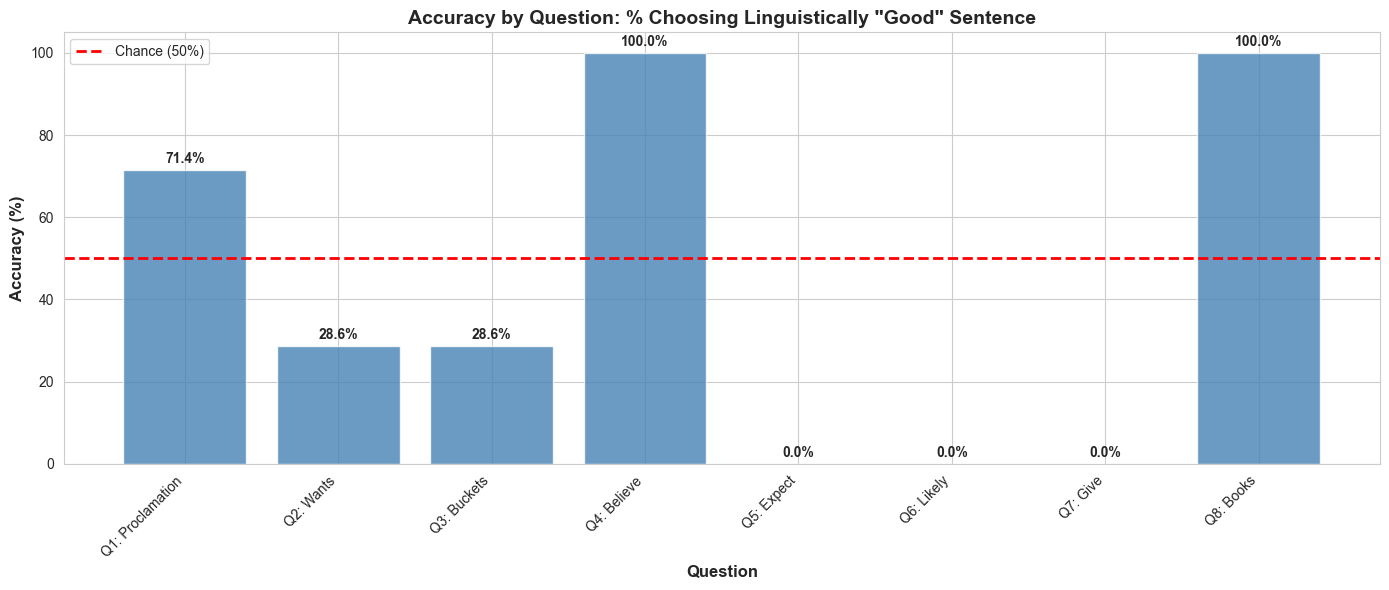

/var/folders/yw/bcvpzzzs41191x2_vrf3xjcr0000gn/T/ipykernel_57745/2646305143.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.groupby('Age_Group')[coded_cols].mean().mean(axis=1) * 100


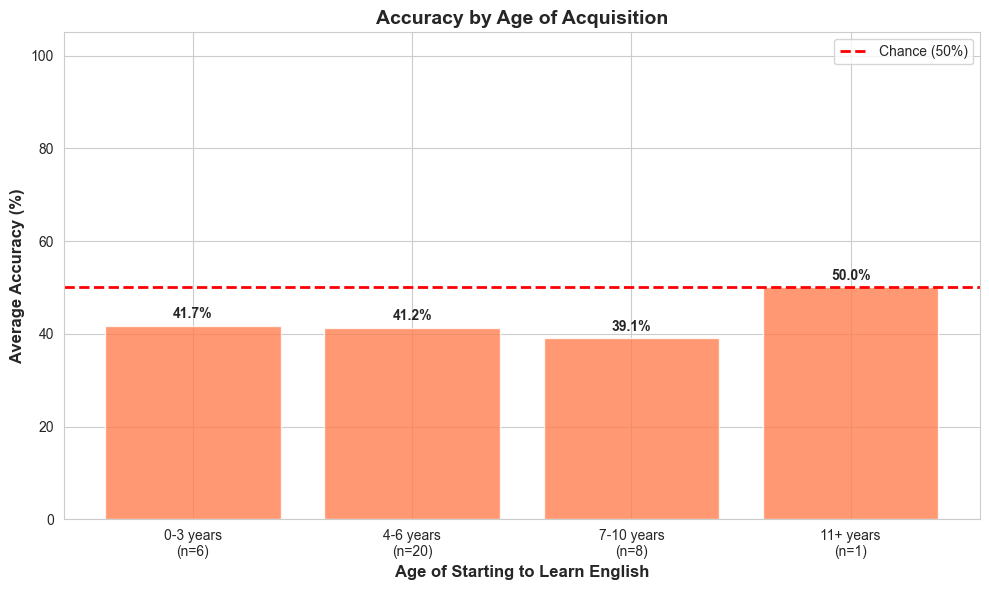

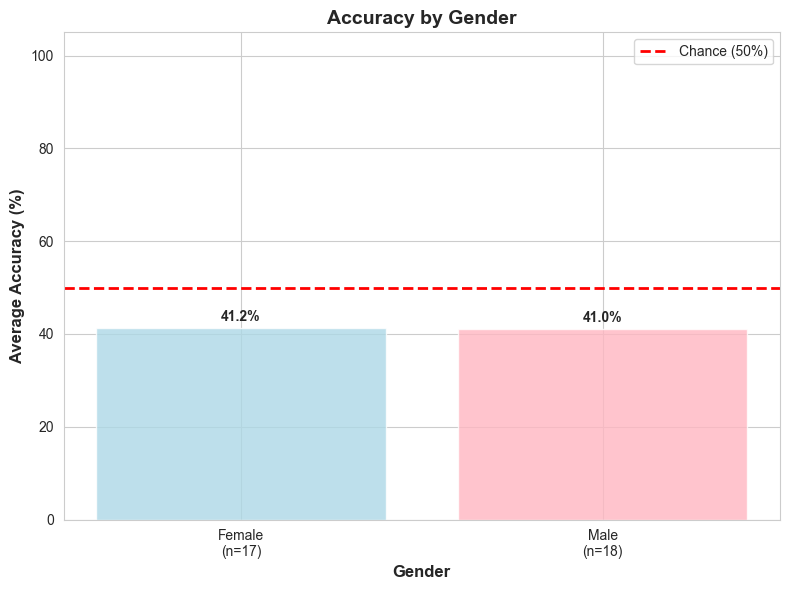

/var/folders/yw/bcvpzzzs41191x2_vrf3xjcr0000gn/T/ipykernel_57745/2646305143.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby('Age_Group')[coded_cols].mean() * 100


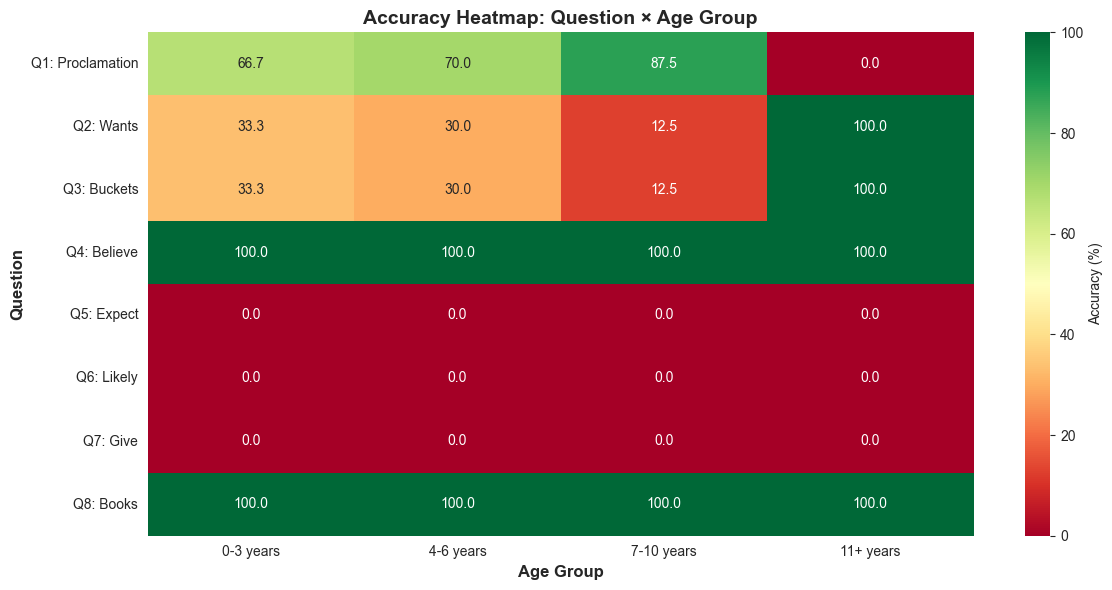

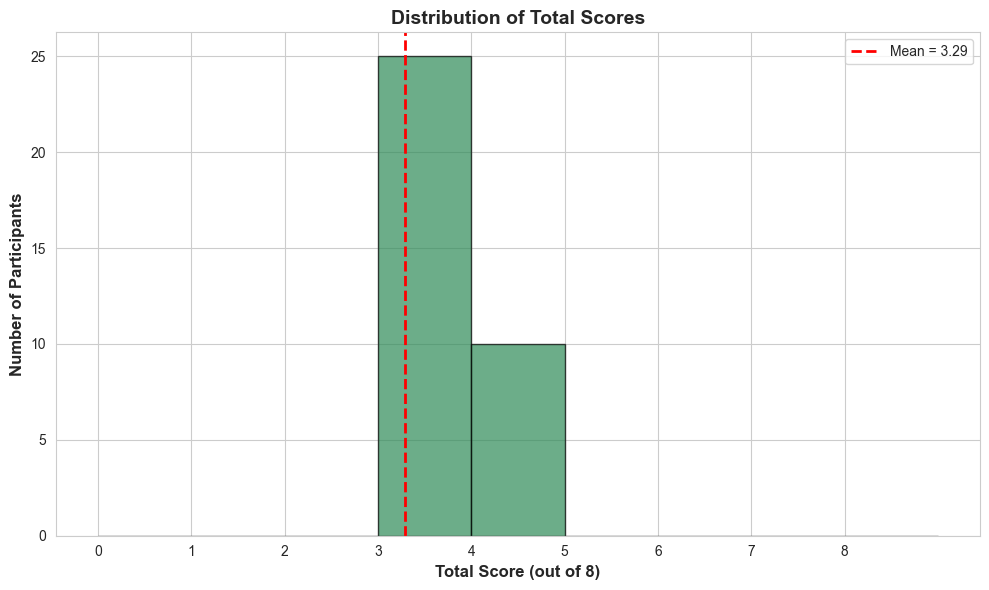


STATISTICAL SUMMARY

Total Score Statistics (out of 8):
Mean: 3.29
Median: 3.00
SD: 0.46
Range: 3 - 4

ANALYSIS COMPLETE!

Plots saved:
- accuracy_by_question.png
- accuracy_by_age.png
- accuracy_by_gender.png
- heatmap_age.png
- score_distribution.png


In [ ]:

# ==============================================================================
# 8. ITEM-LEVEL ANALYSIS
# ==============================================================================

print("\n" + "=" * 80)
print("ITEM DIFFICULTY ANALYSIS")
print("=" * 80)

# Calculate accuracy for each item
item_stats = []
for i, col in enumerate(coded_cols, 1):
    q_label = question_labels[question_cols[i-1]]
    accuracy = df[col].mean() * 100
    n_correct = df[col].sum()
    n_total = len(df)
    item_stats.append({
        'Question': q_label,
        'Accuracy (%)': accuracy,
        'N Correct': n_correct,
        'N Total': n_total
    })

item_df = pd.DataFrame(item_stats).sort_values('Accuracy (%)', ascending=False)
print(item_df.to_string(index=False))



GENERATING VISUALIZATIONS...


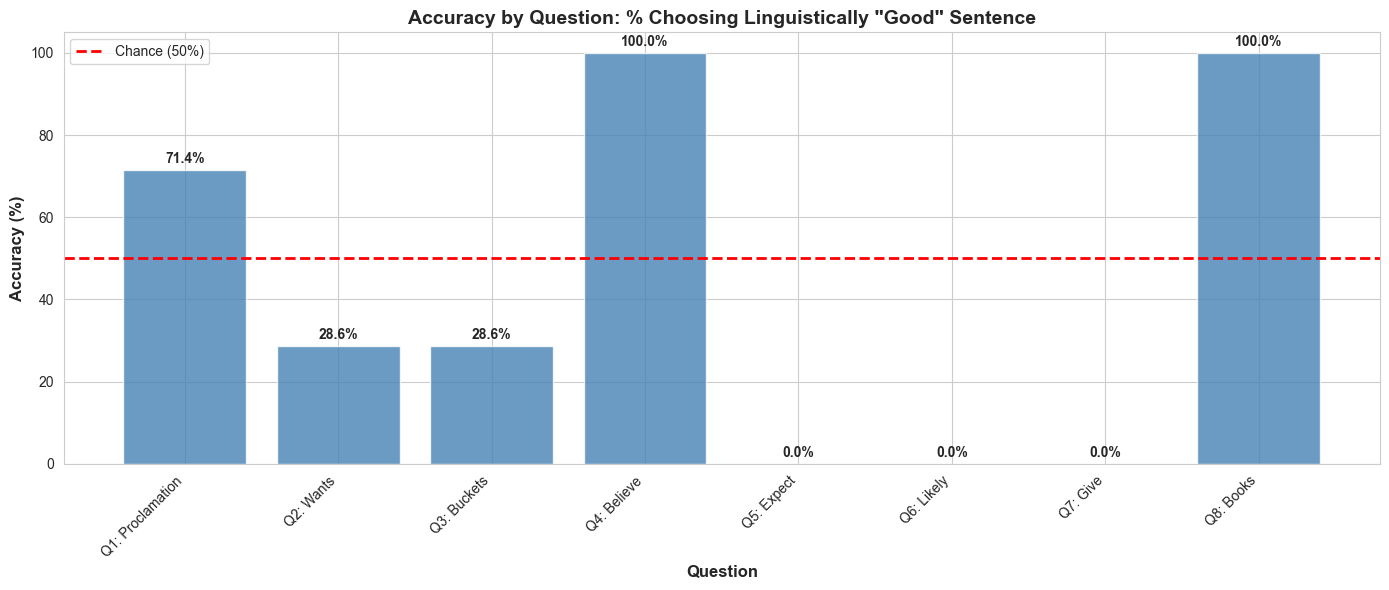

/var/folders/yw/bcvpzzzs41191x2_vrf3xjcr0000gn/T/ipykernel_57745/3653984177.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.groupby('Age_Group')[coded_cols].mean().mean(axis=1) * 100


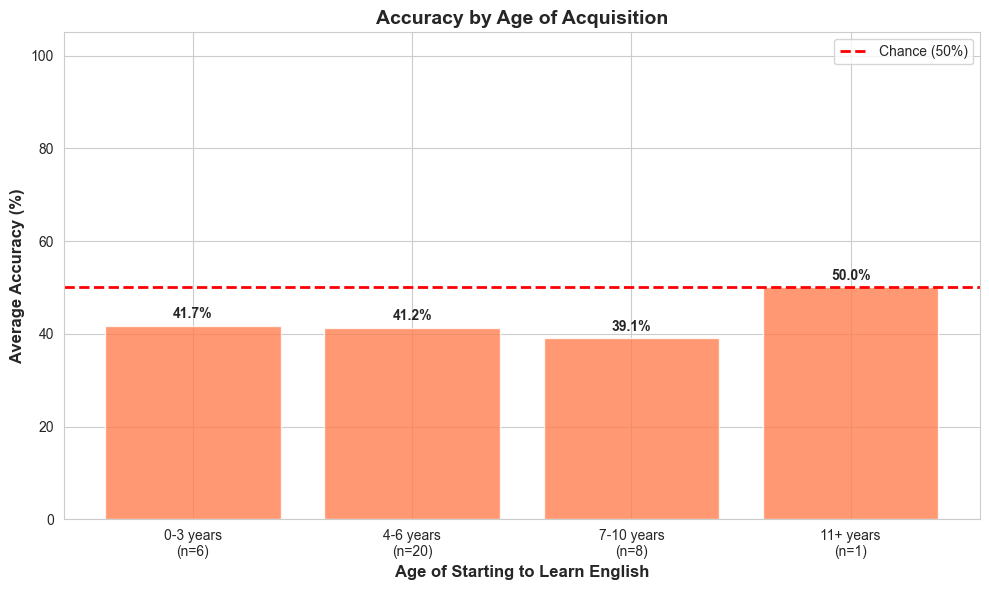

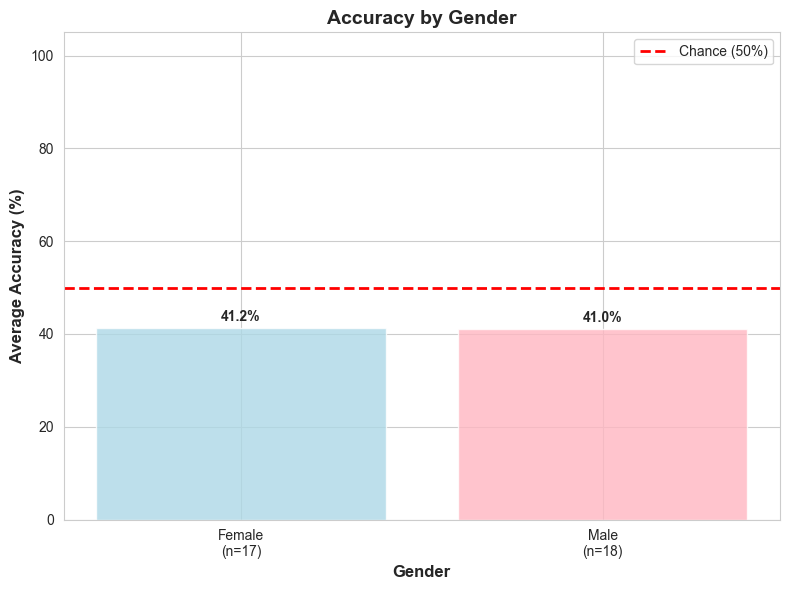

/var/folders/yw/bcvpzzzs41191x2_vrf3xjcr0000gn/T/ipykernel_57745/3653984177.py:91: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby('Age_Group')[coded_cols].mean() * 100


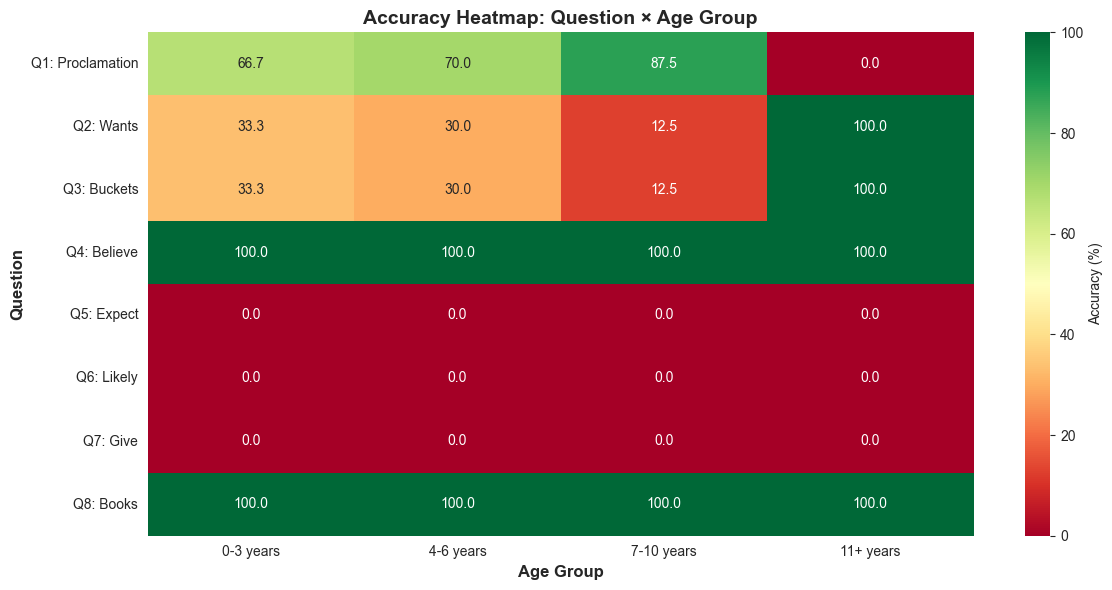

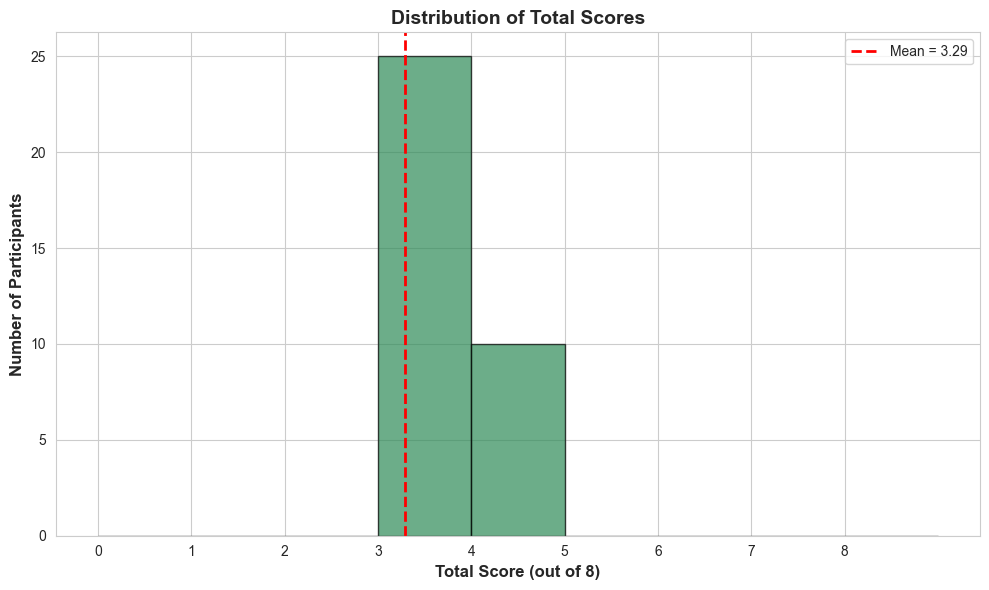

In [25]:

# ==============================================================================
# 9. VISUALIZATIONS
# ==============================================================================

print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS...")
print("=" * 80)

# Plot 1: Overall accuracy by question
fig, ax = plt.subplots(figsize=(14, 6))
questions = [question_labels[q] for q in question_cols]
accuracies = [df[col].mean() * 100 for col in coded_cols]

bars = ax.bar(range(len(questions)), accuracies, color='steelblue', alpha=0.8)
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Chance (50%)')
ax.set_xlabel('Question', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Accuracy by Question: % Choosing Linguistically "Good" Sentence', 
             fontsize=14, fontweight='bold')
ax.set_xticks(range(len(questions)))
ax.set_xticklabels(questions, rotation=45, ha='right')
ax.set_ylim(0, 105)
ax.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('accuracy_by_question.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: Accuracy by Age of Acquisition
fig, ax = plt.subplots(figsize=(10, 6))
age_means = df.groupby('Age_Group')[coded_cols].mean().mean(axis=1) * 100
age_counts = df['Age_Group'].value_counts().sort_index()

x = range(len(age_means))
bars = ax.bar(x, age_means.values, color='coral', alpha=0.8)
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Chance (50%)')
ax.set_xlabel('Age of Starting to Learn English', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Accuracy by Age of Acquisition', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'{label}\n(n={age_counts[label]})' 
                     for label in age_means.index])
ax.set_ylim(0, 105)
ax.legend()

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('accuracy_by_age.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Accuracy by Gender
fig, ax = plt.subplots(figsize=(8, 6))
gender_means = df.groupby('Gender')[coded_cols].mean().mean(axis=1) * 100
gender_counts = df['Gender'].value_counts()

x = range(len(gender_means))
bars = ax.bar(x, gender_means.values, color=['lightblue', 'lightpink'], alpha=0.8)
ax.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Chance (50%)')
ax.set_xlabel('Gender', fontsize=12, fontweight='bold')
ax.set_ylabel('Average Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Accuracy by Gender', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([f'{label.capitalize()}\n(n={gender_counts[label]})' 
                     for label in gender_means.index])
ax.set_ylim(0, 105)
ax.legend()

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('accuracy_by_gender.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 4: Heatmap of accuracy by question and age group
fig, ax = plt.subplots(figsize=(12, 6))
heatmap_data = df.groupby('Age_Group')[coded_cols].mean() * 100
heatmap_data.columns = [question_labels[q] for q in question_cols]

sns.heatmap(heatmap_data.T, annot=True, fmt='.1f', cmap='RdYlGn', 
            center=50, vmin=0, vmax=100, cbar_kws={'label': 'Accuracy (%)'})
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Question', fontsize=12, fontweight='bold')
ax.set_title('Accuracy Heatmap: Question × Age Group', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('heatmap_age.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 5: Distribution of total scores
df['Total_Score'] = df[coded_cols].sum(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['Total_Score'], bins=range(0, 10), color='seagreen', alpha=0.7, edgecolor='black')
ax.axvline(x=df['Total_Score'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Mean = {df["Total_Score"].mean():.2f}')
ax.set_xlabel('Total Score (out of 8)', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Participants', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Total Scores', fontsize=14, fontweight='bold')
ax.set_xticks(range(0, 9))
ax.legend()
plt.tight_layout()
plt.savefig('score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [24]:

# ==============================================================================
# 10. STATISTICAL SUMMARY
# ==============================================================================

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)

print(f"\nTotal Score Statistics (out of 8):")
print(f"Mean: {df['Total_Score'].mean():.2f}")
print(f"Median: {df['Total_Score'].median():.2f}")
print(f"SD: {df['Total_Score'].std():.2f}")
print(f"Range: {df['Total_Score'].min():.0f} - {df['Total_Score'].max():.0f}")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nPlots saved:")
print("- accuracy_by_question.png")
print("- accuracy_by_age.png")
print("- accuracy_by_gender.png")
print("- heatmap_age.png")
print("- score_distribution.png")


STATISTICAL SUMMARY

Total Score Statistics (out of 8):
Mean: 3.29
Median: 3.00
SD: 0.46
Range: 3 - 4

ANALYSIS COMPLETE!

Plots saved:
- accuracy_by_question.png
- accuracy_by_age.png
- accuracy_by_gender.png
- heatmap_age.png
- score_distribution.png
